In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re


In [3]:
df = pd.read_csv('../data/titanic/train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
cols = df.columns
cols


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age is missing a few data entries

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Heatmap of null values

<AxesSubplot:>

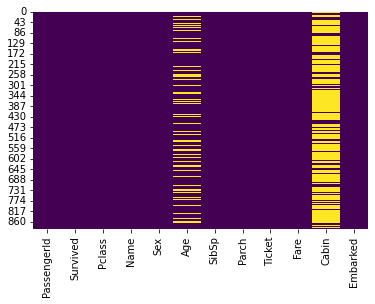

In [9]:
sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False)

## Data Cleaning

In [10]:
def create_feature_has_cabin(df, colname):
    # if NA => 0 else 1
    def _is_nan(x):
        if isinstance(x, type(np.nan)): #checks if object is NAN 
            return 0
        return 1
        
    return df[colname].apply(_is_nan)


In [11]:
df['HasCabin'] = create_feature_has_cabin(df, 'Cabin')

In [12]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
def fill_na_embarked(df, colname):
    
    return df[colname].fillna('S')
    
df['Embarked'] = fill_na_embarked(df, 'Embarked')


In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Wokring on missing Age values

In [15]:
mean = df['Age'].mean()
sd = df['Age'].std()
print(mean,sd)

29.69911764705882 14.526497332334044


In [16]:
def fill_na_age(df, colname):
    mean = df['Age'].mean()
    sd = df['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ())
        return x
    return df[colname].apply(fill_empty).astype(int)
df['Age'] = fill_na_age(df, 'Age')

In [17]:
df['Age'].isna().sum()

0

## Feature Engineering

In [18]:
#SibSp => Sibling/Spouse 
#ParCh => Parent/Child 

def create_feat_familly_size(df):
    return df['SibSp'] + df['Parch'] + 1
    
df['FamilySize'] = create_feat_familly_size(df)

In [19]:
df['FamilySize'].head(10)

0    2
1    2
2    1
3    2
4    1
5    1
6    1
7    5
8    3
9    2
Name: FamilySize, dtype: int64

In [20]:
#For passengers travelling alone
def create_feat_isalone(df, colname):
    def _is_alone(x):
        if x==1:
            return 1
        return 0
    
    return df[colname].apply(_is_alone)
    
df['IsAlone'] = create_feat_isalone(df, 'FamilySize')


Splitting the fare and age into categories

In [21]:
def create_feat_categoricalFare(df, colname):
    return pd.qcut(df[colname], 4, labels = [0, 1, 2, 3]).astype(int)
df['CategoricalFare'] = create_feat_categoricalFare(df, 'Fare')

In [22]:
def create_feat_categoricalFare(df, colname):
    return pd.qcut(df[colname], 4, labels = [0, 1, 2, 3]).astype(int)
df['CategoricalFare'] = create_feat_categoricalFare(df, 'Fare')

Categorising name titles (Mr,Miss,Ms etc)

In [23]:
def create_feat_title(df, colname):
    def find_title(x):
        title_search = re.search(' ([A-Za-z]+)\.', x)
        if title_search:
            title = title_search.group(1)
            if title in ['Mlle', 'Ms']:
                return 'Miss'
            elif title in ['Mme', 'Mrs']:
                return 'Mrs'
            elif title=='Mr':
                return 'Mr'           
            else:
                return 'Rare'
        return ""
    
    return_title= df[colname].apply(find_title)
    dict_title = {'Miss': 1, 'Mrs':2, 'Mr':3, 'Rare':4}
    return return_title.replace(dict_title)
df['Title'] = create_feat_title(df, 'Name')

In [24]:
def create_feat_sex(df, colname):
    def sex(x):
        if x=='male':
            return 1
        return 0
    
    return df[colname].apply(sex)
    
#df['SexNumerical'] = create_feat_sex(df, 'Sex')
df = pd.get_dummies(df,columns= ['Sex'])
df['Embarked'] = df.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})


In [25]:
df.isna().sum()


PassengerId          0
Survived             0
Pclass               0
Name                 0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
HasCabin             0
FamilySize           0
IsAlone              0
CategoricalFare      0
Title                0
Sex_female           0
Sex_male             0
dtype: int64

In [26]:
drop_list = ['PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Name']
titanic = df.drop(drop_list, axis=1)


correlation study

In [27]:
corrmat = titanic.corr()
corrmat


,Survived,Pclass,Age,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,CategoricalFare,Title,Sex_female,Sex_male
Survived,1.000000,-0.338481,-0.070472,0.081629,0.257307,0.106811,0.316912,0.016639,-0.203367,0.299357,0.030949,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.308973,0.018443,-0.549500,0.045702,-0.725541,0.065997,0.135207,-0.634271,0.075428,-0.131900,0.131900
Age,-0.070472,-0.308973,1.000000,-0.172351,0.085758,0.015929,0.220227,-0.239084,0.174353,0.059991,-0.319090,-0.087776,0.087776
Parch,0.081629,0.018443,-0.172351,1.000000,0.216225,-0.078665,0.036987,0.783111,-0.583398,0.393881,0.021398,0.245489,-0.245489
Fare,0.257307,-0.549500,0.085758,0.216225,1.000000,0.062142,0.482075,0.217138,-0.271832,0.579345,0.021076,0.182333,-0.182333
Embarked,0.106811,0.045702,0.015929,-0.078665,0.062142,1.000000,0.013774,-0.080281,0.017807,-0.098161,0.121285,0.116569,-0.116569
HasCabin,0.316912,-0.725541,0.220227,0.036987,0.482075,0.013774,1.000000,-0.009175,-0.158029,0.500936,-0.045148,0.140391,-0.140391
FamilySize,0.016639,0.065997,-0.239084,0.783111,0.217138,-0.080281,-0.009175,1.000000,-0.690922,0.465396,0.101470,0.200988,-0.200988
IsAlone,-0.203367,0.135207,0.174353,-0.583398,-0.271832,0.017807,-0.158029,-0.690922,1.000000,-0.560279,0.074505,-0.303646,0.303646
CategoricalFare,0.299357,-0.634271,0.059991,0.393881,0.579345,-0.098161,0.500936,0.465396,-0.560279,1.000000,-0.045563,0.243613,-0.243613


<AxesSubplot:>

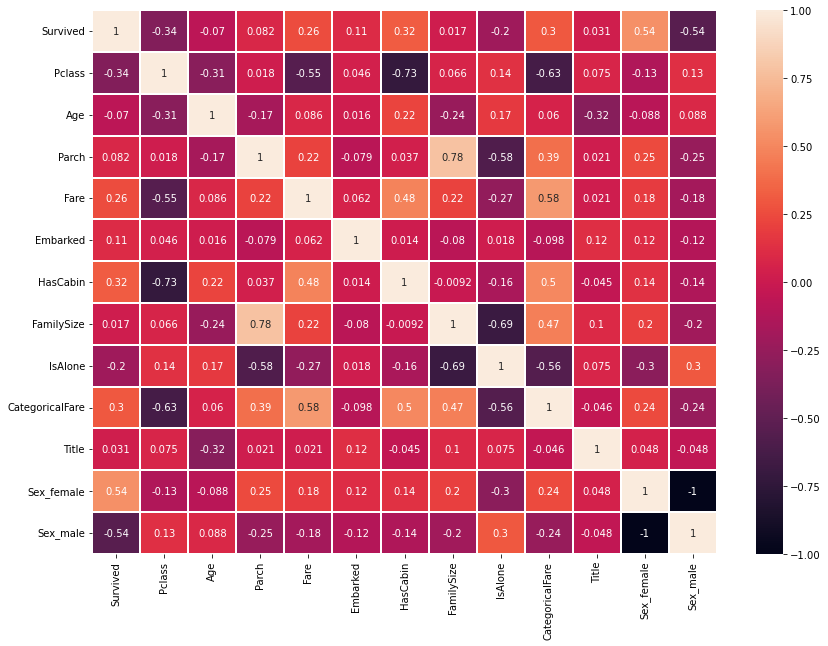

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(), cmap="rocket", annot=True, linewidths=0.2)

### Univariate Analysis

In [29]:
titanic['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


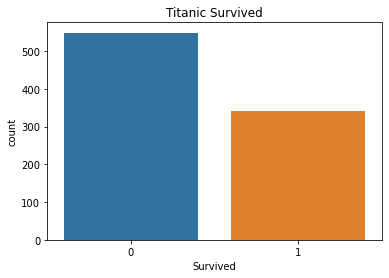

In [30]:
sns.countplot('Survived', data=titanic)
plt.title("Titanic Survived")
plt.show()

<AxesSubplot:ylabel='Survived'>

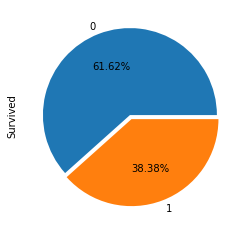

In [31]:
explode = [0, 0.05]
titanic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)


## Bivariate Analysis

In [32]:
titanic['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [33]:
titanic.groupby(['Pclass', 'Survived'])['Survived'].count()


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

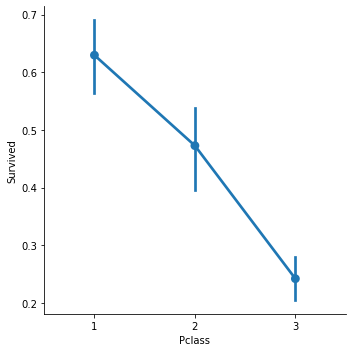

In [34]:
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='point')


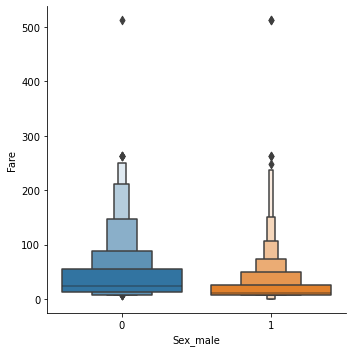

In [37]:
sns.catplot(x='Sex_male', y='Fare', data=titanic, kind='boxen')


## MultiVariate Analysis

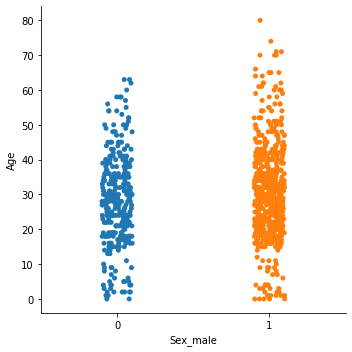

In [38]:
sns.catplot(x='Sex_male', y='Age', data=titanic)


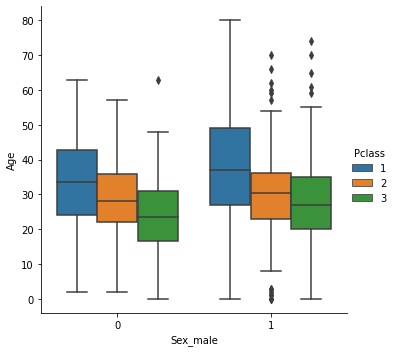

In [39]:
sns.catplot(x='Sex_male', y='Age', data=titanic, kind='box', hue='Pclass')


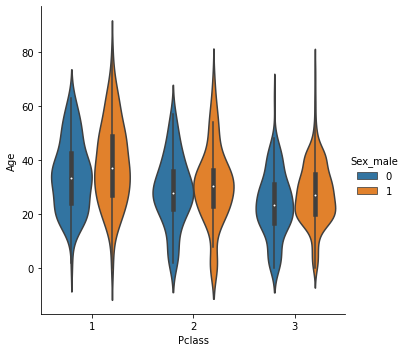

In [41]:
sns.catplot(x='Pclass', y='Age', data=titanic, kind='violin', hue='Sex_male')


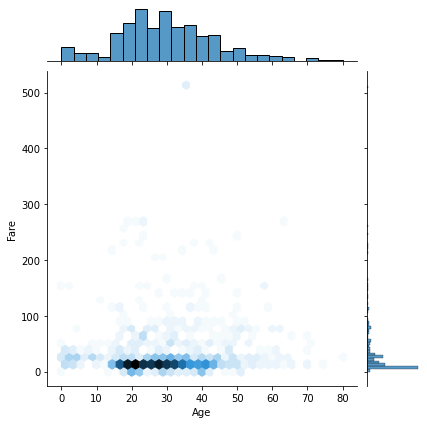

In [42]:
sns.jointplot(x='Age', y='Fare', data=titanic, kind='hex')


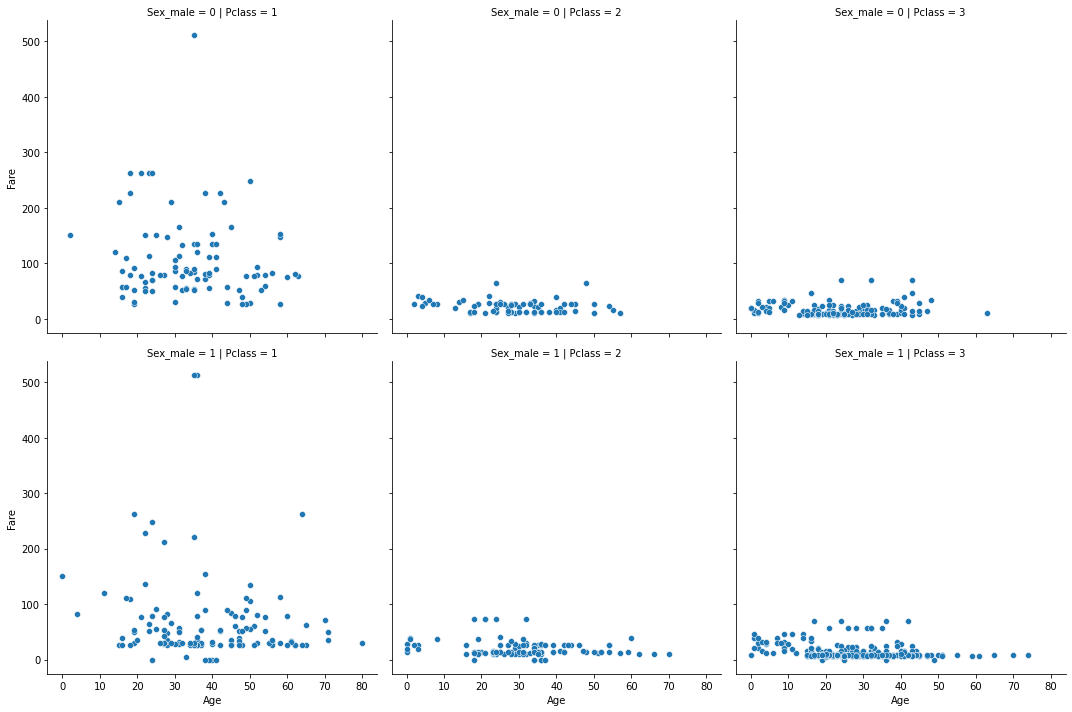

In [43]:
sns.relplot(x='Age', y='Fare', data=titanic, row='Sex_male', col='Pclass')


In [44]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)

In [45]:
target = 'Survived'
features = [ col for col in titanic.columns if col != target ]
X, y = titanic[features], titanic[target]


In [ ]:
#X = pd.get_dummies(X,'sex')

In [46]:
X

,Pclass,Age,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,CategoricalFare,Title,Sex_female,Sex_male
0,3,22,0,7.2500,0,0,2,0,0,3,0,1
1,1,38,0,71.2833,1,1,2,0,3,2,1,0
2,3,26,0,7.9250,0,0,1,1,1,4,1,0
3,1,35,0,53.1000,0,1,2,0,3,2,1,0
4,3,35,0,8.0500,0,0,1,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,13.0000,0,0,1,1,1,4,0,1
887,1,19,0,30.0000,0,1,1,1,2,4,1,0
888,3,19,2,23.4500,0,0,4,0,2,4,1,0
889,1,26,0,30.0000,1,1,1,1,2,3,0,1


In [47]:
seed = 2
rf = RandomForestClassifier(random_state=seed)
et = ExtraTreesClassifier(random_state=seed)
ada = AdaBoostClassifier(random_state=seed)
gb = GradientBoostingClassifier(random_state=seed)


In [48]:
models = [rf, et, ada, gb]
model_names = ['RandomForest', 'ExtraTrees', 'Ada', 'GradientBoost']
[ m.fit(X, y) for m in models ]
feature_importances = { name: m.feature_importances_ for name, m in zip(model_names, models) }


In [49]:
feature_importances

{'RandomForest': array([0.06610249, 0.23657721, 0.02285855, 0.19072624, 0.03295432,
        0.03970582, 0.05022957, 0.01237082, 0.0383038 , 0.08452015,
        0.11107178, 0.11457926]),
 'ExtraTrees': array([0.08115468, 0.23115703, 0.02381481, 0.16774244, 0.03400849,
        0.04644347, 0.0439655 , 0.014658  , 0.04519224, 0.05757566,
        0.13244895, 0.12183874]),
 'Ada': array([0.02, 0.32, 0.02, 0.36, 0.02, 0.04, 0.12, 0.02, 0.  , 0.06, 0.  ,
        0.02]),
 'GradientBoost': array([0.12224988, 0.12703348, 0.00100879, 0.12565864, 0.02115111,
        0.04310279, 0.06461189, 0.00357381, 0.00344459, 0.01487261,
        0.20885343, 0.26443897])}

In [50]:
feature_df = pd.DataFrame(feature_importances)



In [51]:
feature_df

,RandomForest,ExtraTrees,Ada,GradientBoost
0,0.066102,0.081155,0.02,0.122250
1,0.236577,0.231157,0.32,0.127033
2,0.022859,0.023815,0.02,0.001009
3,0.190726,0.167742,0.36,0.125659
4,0.032954,0.034008,0.02,0.021151
5,0.039706,0.046443,0.04,0.043103
6,0.050230,0.043965,0.12,0.064612
7,0.012371,0.014658,0.02,0.003574
8,0.038304,0.045192,0.00,0.003445
9,0.084520,0.057576,0.06,0.014873


In [52]:
features

['Pclass',
 'Age',
 'Parch',
 'Fare',
 'Embarked',
 'HasCabin',
 'FamilySize',
 'IsAlone',
 'CategoricalFare',
 'Title',
 'Sex_female',
 'Sex_male']

In [53]:
feature_df.insert(0, 'features', features)

In [54]:
feature_df['mean'] = feature_df.mean(axis=1)
feature_df


C:\Users\Dell\AppData\Local\Temp/ipykernel_10940/1015519725.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_df['mean'] = feature_df.mean(axis=1)


,features,RandomForest,ExtraTrees,Ada,GradientBoost,mean
0,Pclass,0.066102,0.081155,0.02,0.122250,0.072377
1,Age,0.236577,0.231157,0.32,0.127033,0.228692
2,Parch,0.022859,0.023815,0.02,0.001009,0.016921
3,Fare,0.190726,0.167742,0.36,0.125659,0.211032
4,Embarked,0.032954,0.034008,0.02,0.021151,0.027028
5,HasCabin,0.039706,0.046443,0.04,0.043103,0.042313
6,FamilySize,0.050230,0.043965,0.12,0.064612,0.069702
7,IsAlone,0.012371,0.014658,0.02,0.003574,0.012651
8,CategoricalFare,0.038304,0.045192,0.00,0.003445,0.021735
9,Title,0.084520,0.057576,0.06,0.014873,0.054242


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [57]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[(name, m) for name, m in zip(model_names, models)
])
vc.fit(X, y)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(random_state=2)),
                             ('ExtraTrees',
                              ExtraTreesClassifier(random_state=2)),
                             ('Ada', AdaBoostClassifier(random_state=2)),
                             ('GradientBoost',
                              GradientBoostingClassifier(random_state=2))])

In [58]:
scores = cross_val_score(vc, X, y, cv=5, scoring='accuracy')
scores

array([0.79329609, 0.78651685, 0.85393258, 0.80337079, 0.86516854])

In [59]:
vc.fit(X_train, y_train)


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(random_state=2)),
                             ('ExtraTrees',
                              ExtraTreesClassifier(random_state=2)),
                             ('Ada', AdaBoostClassifier(random_state=2)),
                             ('GradientBoost',
                              GradientBoostingClassifier(random_state=2))])

In [60]:
pred = vc.predict(X_test)
100. * (pred == y_test).mean()


80.44692737430168